In [68]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#------------------Loading data and data Preprocessing------------------#

df = pd.read_csv('nsl-kdd.csv')
label_encoder = LabelEncoder()
# Separate features and target
X = df[["service","src_bytes"]]
y = label_encoder.fit_transform(df['class'])


In [61]:
# Print the column names of the categorical data
print(X['service'].unique())
print(X["service"].value_counts())
numerical_features = ['src_bytes']  
categorical_features = ['service']  


['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
service
http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64


In [ ]:
#--------------------------------------Using OneHotEncoder--------------------------------------


# Create a ColumnTransformer for preprocessing
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_features),  # Scaling numerical feature
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)  # OneHotEncoding categorical feature
)

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)


# Get the names of the one-hot encoded columns
cat_columns = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features)

# Combine column names: 1 numerical column + all categorical one-hot columns
column_names = ['src_bytes_scaled'] + list(cat_columns)

# Convert the preprocessed data into a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=column_names)



In [83]:
#---------------------------------Model Building---------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.3, random_state=42)


# Get the number of features and output classes
n_features = X_train.shape[1]
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer (optional)
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary cross-entropy loss and SGD optimizer
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Summary of the model
model.summary()

c:\Users\alwin\Desktop\AI_for_cyber\.ai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,721 (26.25 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

Gradient Descent & Backpropagation: Gradient descent helps minimize the loss by adjusting the weights in the neural network, while backpropagation updates the weights by calculating the gradient of the loss function concerning each weight using the chain rule.

Epoch 1/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - accuracy: 0.8974 - loss: 0.2915 - val_accuracy: 0.8972 - val_loss: 0.2814
Epoch 2/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.8999 - loss: 0.2736 - val_accuracy: 0.8985 - val_loss: 0.2745
Epoch 3/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.9017 - loss: 0.2686 - val_accuracy: 0.8997 - val_loss: 0.2713
Epoch 4/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.8989 - loss: 0.2706 - val_accuracy: 0.8997 - val_loss: 0.2688
Epoch 5/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.9003 - loss: 0.2675 - val_accuracy: 0.8997 - val_loss: 0.2688
Epoch 6/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 717us/step - accuracy: 0.9016 - loss: 0.2623 - val_accuracy: 0.8999 - val_loss: 0.2681
Epoch 7/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.9011 - loss: 0.2646 - val_accuracy: 0.8987 - val_loss: 0.2677
Epoch 8/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.9017 -

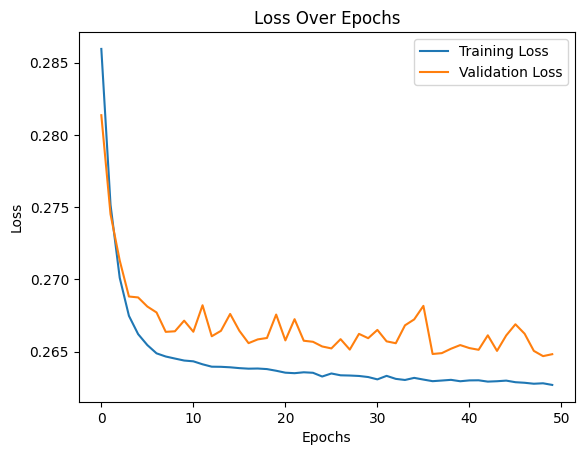

In [78]:
#---------------------------------Model Training---------------------------------


history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=32, verbose=1)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step


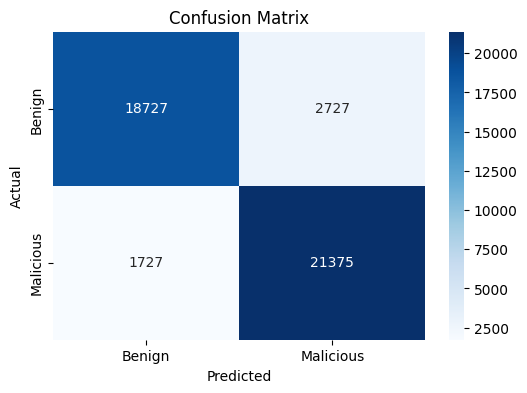

              precision    recall  f1-score   support

      Benign       0.92      0.87      0.89     21454
   Malicious       0.89      0.93      0.91     23102

    accuracy                           0.90     44556
   macro avg       0.90      0.90      0.90     44556
weighted avg       0.90      0.90      0.90     44556



In [81]:
#---------------------------------Model Evaluation---------------------------------

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))


In [94]:
#---------------------------------Hyperparameter Tuning:learning rate---------------------------------

# Compile model with a different learning rate
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
# Retrain and observe performance
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 861us/step - accuracy: 0.8179 - loss: 0.4302 - val_accuracy: 0.8321 - val_loss: 0.4264
Epoch 2/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 830us/step - accuracy: 0.8178 - loss: 0.4300 - val_accuracy: 0.8221 - val_loss: 0.4176
Epoch 3/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - accuracy: 0.8159 - loss: 0.4334 - val_accuracy: 0.8323 - val_loss: 0.4389
Epoch 4/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - accuracy: 0.8184 - loss: 0.4294 - val_accuracy: 0.7586 - val_loss: 0.5908
Epoch 5/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - accuracy: 0.8145 - loss: 0.4345 - val_accuracy: 0.7981 - val_loss: 0.4698
Epoch 6/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 730us/step - accuracy: 0.8149 - loss: 0.4326 - val_accuracy: 0.8207 - val_loss: 0.4352
Epoch 7/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.8137 - loss: 0.4350 - val_accuracy: 0.8253 - val_loss: 0.4191
Epoch 8/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.8195 -

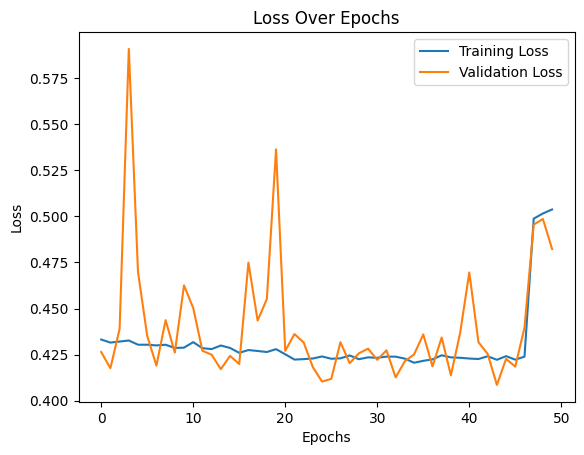

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step


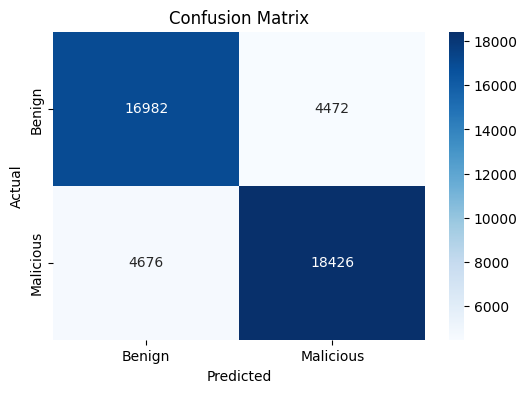

              precision    recall  f1-score   support

      Benign       0.78      0.79      0.79     21454
   Malicious       0.80      0.80      0.80     23102

    accuracy                           0.79     44556
   macro avg       0.79      0.79      0.79     44556
weighted avg       0.79      0.79      0.79     44556



In [95]:
#---------------------------------Model Evaluation---------------------------------

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))


In [96]:
#---------------------------------Using Adam Optimizer---------------------------------

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Retrain the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 868us/step - accuracy: 0.8272 - loss: 0.4376 - val_accuracy: 0.8290 - val_loss: 0.4095
Epoch 2/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - accuracy: 0.8350 - loss: 0.4000 - val_accuracy: 0.8291 - val_loss: 0.4040
Epoch 3/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step - accuracy: 0.8312 - loss: 0.4010 - val_accuracy: 0.8321 - val_loss: 0.4050
Epoch 4/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 769us/step - accuracy: 0.8341 - loss: 0.3959 - val_accuracy: 0.8326 - val_loss: 0.3978
Epoch 5/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 776us/step - accuracy: 0.8346 - loss: 0.3930 - val_accuracy: 0.8326 - val_loss: 0.3968
Epoch 6/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step - accuracy: 0.8341 - loss: 0.3932 - val_accuracy: 0.8327 - val_loss: 0.3962
Epoch 7/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step - accuracy: 0.8349 - loss: 0.3930 - val_accuracy: 0.8368 - val_loss: 0.3943
Epoch 8/50
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - accuracy: 0.8369 -

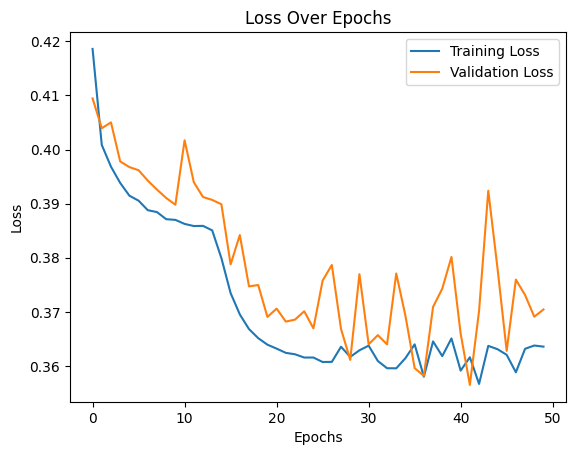

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step


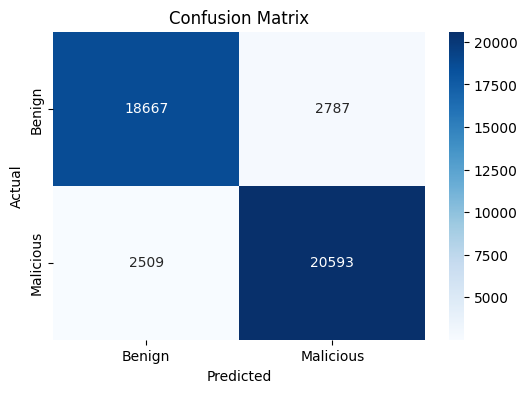

              precision    recall  f1-score   support

      Benign       0.88      0.87      0.88     21454
   Malicious       0.88      0.89      0.89     23102

    accuracy                           0.88     44556
   macro avg       0.88      0.88      0.88     44556
weighted avg       0.88      0.88      0.88     44556



In [97]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))
